In [5]:
import pandas as pd
# Define the file path to your CSV file
# Replace 'single genre artists.csv' with the actual path if the file is in a different directory
file_path = '/content/single_genre_artists.csv Amazon - mini project.csv'

In [8]:
df = pd.read_csv(file_path)
print(df)

                     id_songs          name_song  popularity_songs  \
0      0IA0Hju8CAgYfV1hwhidBH            La Java                 0   
1      1b8HZQCqcqwbzlA1jRTp6E           En Douce                 0   
2      5d5gQxHwYovxR5pqETOIAa      J'en Ai Marre                 0   
3      1EO65UEEPfy7CR0NK2sDxy   Ils n'ont pas ca                 0   
4      6a58gXSgqbIsXUhVZ6ZJqe          La belote                 0   
...                       ...                ...               ...   
95832  44r4zta6P9flkhKaVnbsvG             Freaks                70   
95833  0MmaEacabpK8Yp3Mdeo5uY                下雨天                50   
95834  1dKxf4Ht2SsKLyXfSDJAgy   The Cutest Puppy                67   
95835  0SjsIzJkZfDU7wlcdklEFR  John Brown's Song                66   
95836  5rgu12WBIHQtvej2MdHSH0                云与海                50   

       duration_ms  explicit              id_artists release_date  \
0           161427         0  4AxgXfD7ISvJSTObqm4aIE         1922   
1           223440   

In [3]:
df.drop(columns=['name_artists', 'id_artists', 'name_song'], inplace=True, errors='ignore')

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [10]:
df

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.1840,4,...,0.993,0.000016,0.3250,0.654,133.088,3,5078,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.1800,10,...,0.989,0.000000,0.1280,0.431,78.459,3,5078,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.2060,0,...,0.995,0.000000,0.4180,0.481,70.443,4,5078,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.4670,9,...,0.991,0.000000,0.2190,0.726,129.775,4,5078,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.2980,9,...,0.991,0.000000,0.3730,0.844,75.950,4,5078,['vintage chanson'],Mistinguett,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95832,44r4zta6P9flkhKaVnbsvG,Freaks,70,174800,0,14Y3trk7LaslSFTk1G35rx,25-02-2019,0.674,0.5680,1,...,0.116,0.000000,0.1650,0.640,166.107,4,16057,['alt z'],Jordan Clarke,56
95833,0MmaEacabpK8Yp3Mdeo5uY,下雨天,50,265846,0,5VGgFE9nPgMfEnYiPT5J2B,25-02-2020,0.528,0.6730,4,...,0.143,0.000000,0.0989,0.297,130.066,4,929,['chinese viral pop'],芝麻,36
95834,1dKxf4Ht2SsKLyXfSDJAgy,The Cutest Puppy,67,82500,0,7vgGpuiXdNlCmc994PlMlz,30-10-2020,0.609,0.0172,8,...,0.996,0.973000,0.1080,0.890,68.619,4,23,['instrumental lullaby'],Laureen Conrad,52
95835,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,185250,0,4MxqhahGRT4BPz1PilXGeu,20-03-2020,0.562,0.0331,1,...,0.996,0.961000,0.1110,0.386,63.696,3,91,['instrumental lullaby'],Gregory Oberle,55


In [11]:
scalar = StandardScaler()
scaled_data = scalar.fit_transform(df[['danceability','energy','loudness','instrumentalness']])
scaled_data

array([[-0.15347598, -1.51112816, -0.75790895, -0.35333823],
       [-1.02851842, -1.52805562, -1.09862851, -0.35340491],
       [-0.48805103, -1.41802711, -1.12789922, -0.35340491],
       ...,
       [ 0.14249425, -2.21700341, -3.87787243,  3.83264805],
       [-0.15991012, -2.14971674, -3.24149759,  3.7810215 ],
       [-0.17277839, -0.09768491,  0.56580125, -0.35340491]])

In [12]:
df.shape

(95837, 23)

In [13]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
pca_result

array([[-1.36897003, -0.86886259],
       [-1.87468949, -0.43312115],
       [-1.65274149, -0.73812192],
       ...,
       [-5.02404405,  0.50412483],
       [-4.65573874,  0.86576526],
       [ 0.35585786,  0.00982984]])

In [14]:
import pandas as pd
from sklearn.decomposition import PCA

pca_instance = PCA(n_components=2)
pca_result = pca_instance.fit_transform(scaled_data)
df_pcs = pd.DataFrame(data = pca_result, columns = ['PCA_1','PCA_2'])
df_pcs

,PCA_1,PCA_2
0,-1.368970,-0.868863
1,-1.874689,-0.433121
2,-1.652741,-0.738122
3,-0.203624,-0.826547
4,-0.895165,-1.053439
...,...,...
95832,0.871222,-0.302990
95833,1.216636,0.595384
95834,-5.024044,0.504125
95835,-4.655739,0.865765


In [15]:
pca.explained_variance_ratio_

array([0.47894083, 0.25230539])

In [16]:
0.47894083 + 0.25230539

0.7312462200000001

In [17]:
# 'danceability','energy','loudness','instrumentalness'
# 0.31748862,  0.62732951,  0.63778352, -0.31446914 - PCA_1
# -0.61792669,  0.34070414,  0.29103203,  0.64605545 - PCA_2

In [18]:
pca.components_

array([[ 0.31748862,  0.62732951,  0.63778352, -0.31446914],
       [-0.61792669,  0.34070414,  0.29103203,  0.64605545]])

KMeans(n_clusters=4, random_state=100)


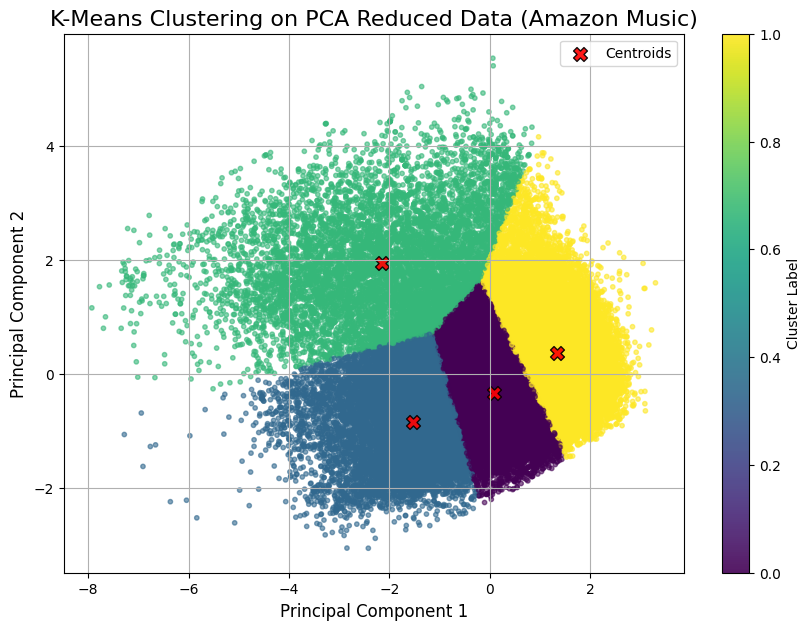

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Applying K-means clustering
kmeans_model = KMeans(n_clusters=4, random_state=100)
kmeans_model.fit(pca_result)
print(kmeans_model)

y_means = kmeans_model.predict(pca_result) # Get cluster labels for plotting

plt.figure(figsize=(10, 7)) # Create a figure for better control
# Scatter plot of PCA results, colored by cluster
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_means, s=10, cmap='viridis', alpha=0.6)

# Plot the cluster centroids
centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.9, marker='X', edgecolors='black', label='Centroids') # centroids

plt.title('K-Means Clustering on PCA Reduced Data (Amazon Music)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend()
plt.grid(True)
plt.colorbar(label='Cluster Label')
plt.show()

In [20]:
# get cluster labels and centroids
x = pca_result
y_means = kmeans_model.predict(x)
print(y_means)
centroids = kmeans_model.cluster_centers_
print(centroids)

[1 1 1 ... 2 2 0]
[[ 0.07768463 -0.33010708]
 [-1.52400168 -0.83867772]
 [-2.15231974  1.94359943]
 [ 1.33154146  0.36528324]]


In [21]:
from sklearn.metrics import silhouette_score

# silhouette score
score = silhouette_score(pca_result, y_means)
print('silhouette_score = ', score)

silhouette_score =  0.3392322039957216


k value =  1 Inertia_value =  280321.77899182314
k value =  2 Inertia_value =  163628.60605017986
k value =  3 Inertia_value =  113071.51122136772
k value =  4 Inertia_value =  91000.9076481685
k value =  5 Inertia_value =  70964.4080648253
k value =  6 Inertia_value =  62409.62368741951
k value =  7 Inertia_value =  53475.335398089424
k value =  8 Inertia_value =  46531.47786435574
k value =  9 Inertia_value =  42570.250491708546


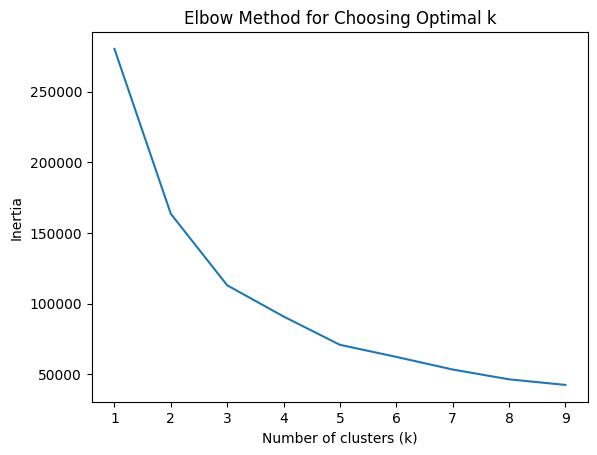

In [22]:
# Elbow method
Inertia_values= []
k_range = range(1,10) # test k 1 to 9

for k in k_range:
  kmeans = KMeans(n_clusters = k, random_state = 42, n_init='auto') # Corrected class name, parameter, and added n_init
  kmeans.fit(pca_result) # Corrected variable for data and attribute access
  Inertia_values.append(kmeans.inertia_)
  print('k value = ',k, 'Inertia_value = ',kmeans.inertia_)

# plot inertia vs Elbow method
plt.plot(k_range, Inertia_values)  #inertia = sum of aquared distance to nearest centroids
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia") # Changed label for clarity
plt.title("Elbow Method for Choosing Optimal k") # Added title
plt.show()

In [24]:
# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
from sklearn.cluster import DBSCAN
import numpy as np # Import numpy for NaN handling if needed
from sklearn.decomposition import PCA # Ensure PCA is imported
from sklearn.preprocessing import StandardScaler # Added to define scaled_data
import pandas as pd # Import pandas for DataFrame operations

# Re-define df and scaled_data to ensure they are available within this cell's scope
# Define the file path to your CSV file
file_path = '/content/single_genre_artists.csv Amazon - mini project.csv'
df = pd.read_csv(file_path)
df.drop(columns=['name_artists', 'id_artists', 'name_song'], inplace=True, errors='ignore')

scalar = StandardScaler()
scaled_data = scalar.fit_transform(df[['danceability','energy','loudness','instrumentalness']])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Initialize DBSCAN model
dbscan_model = DBSCAN(eps=0.5, min_samples=5)

# Fit the model to your PCA results
dbscan_model.fit(pca_result)









DBSCAN()